In [1]:
import pandas as pd

In [11]:
df = pd.read_csv('main/project_2/data_mini2/현대_공장별_판매실적.csv')

In [12]:
df.head()

,공장명(국가),차량 모델,판매 구분,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,연도
0,HMI,Santro (AH2),내수용,0,0,0,0,0,0,0,0,0,0,0,0,2023
1,HMI,Xcent (BA 4DR),내수용,0,0,0,0,0,0,0,0,0,0,0,0,2023
2,HMI,Aura (AI3 4DR),내수용,4634,5524,3774,5085,4707,4907,4514,4892,3900,4096,3850,3812,2023
3,HMI,NIOS (AI3 5DR),내수용,8760,9635,9304,6839,6385,6321,5337,7306,5223,6552,4708,5247,2023
4,HMI,i20 (BI3 5DR),내수용,8185,9287,6596,6472,6094,6162,5001,4896,6481,7212,5727,4574,2023


In [15]:
df_melted = df.melt(id_vars=['공장명(국가)', '차량 모델', '판매 구분', '연도'],
        value_vars=['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'],
        var_name='월', value_name='판매량')

In [17]:
df_melted.head()

,공장명(국가),차량 모델,판매 구분,연도,월,판매량
0,HMI,Santro (AH2),내수용,2023,1월,0
1,HMI,Xcent (BA 4DR),내수용,2023,1월,0
2,HMI,Aura (AI3 4DR),내수용,2023,1월,4634
3,HMI,NIOS (AI3 5DR),내수용,2023,1월,8760
4,HMI,i20 (BI3 5DR),내수용,2023,1월,8185


In [18]:
월_매핑 = {
    "1월": 1, "2월": 2, "3월": 3, "4월": 4, "5월": 5, "6월": 6,
    "7월": 7, "8월": 8, "9월": 9, "10월": 10, "11월": 11, "12월": 12
}

In [19]:
df_melted['월_숫자'] = df_melted['월'].map(월_매핑)

In [20]:
df_melted['날짜'] = pd.to_datetime(df_melted['연도'].astype(str) + df_melted['월_숫자'].astype(str), format='%Y%m')

In [21]:
df_melted

,공장명(국가),차량 모델,판매 구분,연도,월,판매량,월_숫자,날짜
0,HMI,Santro (AH2),내수용,2023,1월,0,1,2023-01-01
1,HMI,Xcent (BA 4DR),내수용,2023,1월,0,1,2023-01-01
2,HMI,Aura (AI3 4DR),내수용,2023,1월,4634,1,2023-01-01
3,HMI,NIOS (AI3 5DR),내수용,2023,1월,8760,1,2023-01-01
4,HMI,i20 (BI3 5DR),내수용,2023,1월,8185,1,2023-01-01
...,...,...,...,...,...,...,...,...
4687,Singapore,IONIQ6 (CE),내수용,2025,12월,0,12,2025-12-01
4688,Singapore,IONIQ5 (NE),수출용,2025,12월,0,12,2025-12-01
4689,Singapore,IONIQ5 Robotaxi (NE R),수출용,2025,12월,0,12,2025-12-01
4690,CKD,PV,합계,2025,12월,0,12,2025-12-01


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\USER\AppData\Local\Temp\ipykernel_22384\1160761524.py:9: UserWarning:

Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) DejaVu Sans.

C:\Users\USER\AppData\Local\Temp\ipykernel_22384\1160761524.py:9: UserWarning:

Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) DejaVu Sans.

C:\Users\USER\AppData\Local\Temp\ipykernel_22384\1160761524.py:9: UserWarning:

Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from font(s) DejaVu Sans.

C:\Users\USER\AppData\Local\Temp\ipykernel_22384\1160761524.py:9: UserWarning:

Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.

C:\Users\USER\AppData\Local\Temp\ipykernel_22384\1160761524.py:9: UserWarning:

Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.

C:\Users\USER\AppData\Local\Temp\ipykernel_22384\1160761524.py:9: UserWarning:

Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from font(s) DejaVu Sans.

C:\Users\USER\AppData\Local\Temp\ipykernel_22384\1160761524.py:9: UserWarning:


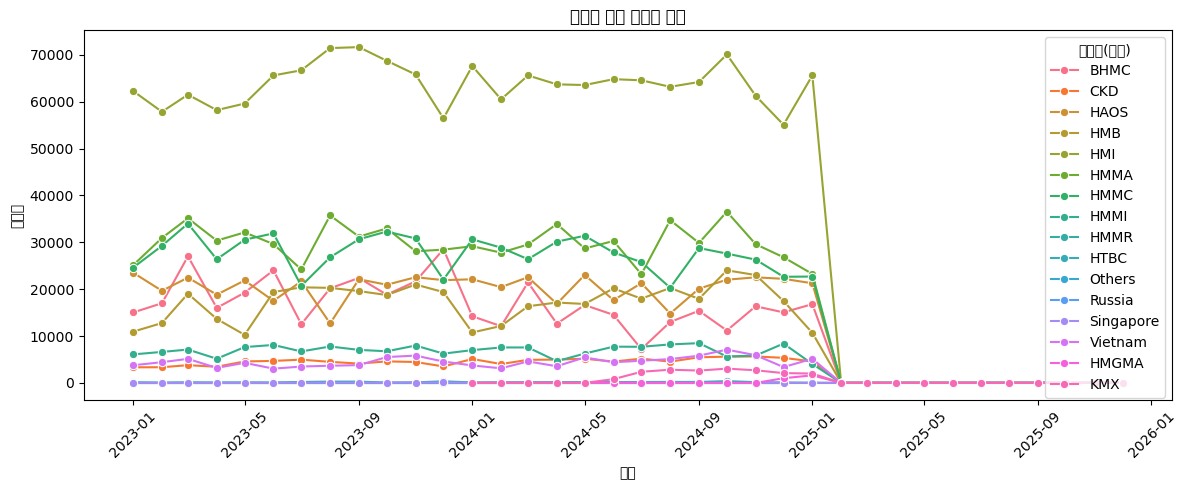

In [22]:
# 1. 공장별 전체 판매량 추이
plt.figure(figsize=(12, 5))
df_group1 = df_melted.groupby(["날짜", "공장명(국가)"])["판매량"].sum().reset_index()
sns.lineplot(data=df_group1, x="날짜", y="판매량", hue="공장명(국가)", marker="o")
plt.title("공장별 전체 판매량 추이")
plt.xlabel("날짜")
plt.ylabel("판매량")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
month_cols = ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']

In [26]:
# 2. 공장별 연간 총 판매량 (Bar Chart)
df['총합'] = df[month_cols].sum(axis=1)
bar_df = df.groupby('공장명(국가)')['총합'].sum().reset_index()

C:\Users\USER\AppData\Local\Temp\ipykernel_22384\2906206651.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\USER\AppData\Local\Temp\ipykernel_22384\2906206651.py:7: UserWarning:

Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from font(s) DejaVu Sans.

C:\Users\USER\AppData\Local\Temp\ipykernel_22384\2906206651.py:7: UserWarning:

Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.

C:\Users\USER\AppData\Local\Temp\ipykernel_22384\2906206651.py:7: UserWarning:

Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from font(s) DejaVu Sans.

C:\Users\USER\AppData\Local\Temp\ipykernel_22384\2906206651.py:7: UserWarning:

Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from font(s) DejaVu Sans.

C:\Users\USER\AppData\Local\Temp\ipykernel_22384\2906206651.py:7: UserWarning:

Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from f

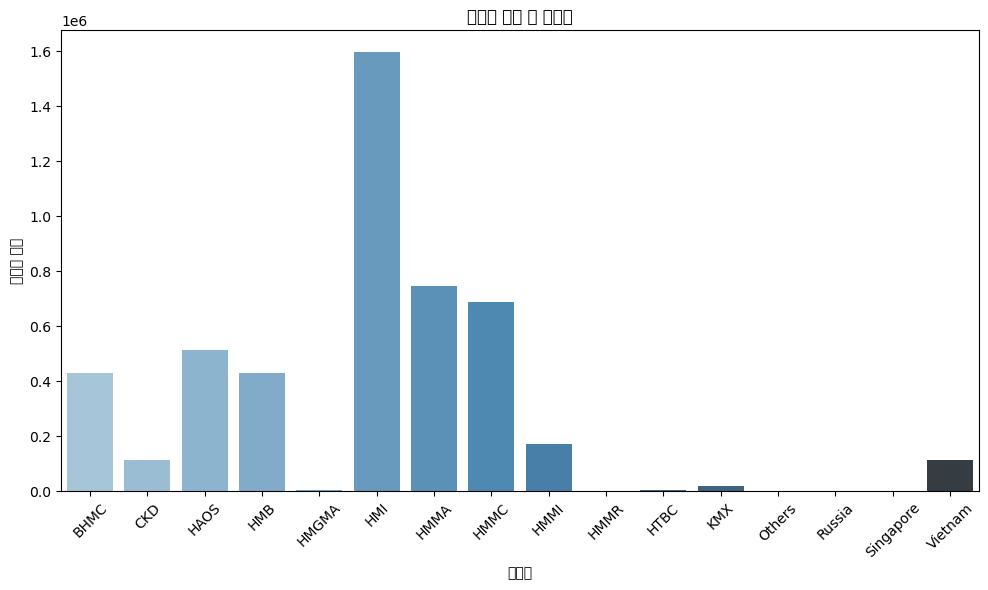

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(data=bar_df, x="공장명(국가)", y="총합", palette="Blues_d")
plt.title("공장별 연간 총 판매량")
plt.xlabel("공장명")
plt.ylabel("판매량 합계")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [30]:
# 3. 공장별 내수/수출 비율 (Pie Chart)
pie_df = df.groupby(['공장명(국가)', '판매 구분'])['총합'].sum().reset_index()

In [32]:
factory = "HMI"
filtered_pie = pie_df[pie_df["공장명(국가)"] == factory]

In [33]:
import plotly.express as px

In [34]:
fig = px.pie(filtered_pie, names="판매 구분", values="총합", title=f"{factory} 내수/수출 비율")
fig.show()

In [35]:
# 1. 차량 모델별 월별 판매 트렌드 (Line Chart)
line_df = df.groupby('차량 모델')[month_cols].sum().T
line_df.columns.name = None

In [37]:
line_df

,Aura (AI3 4DR),Celesta (ID),Creta (SU2i EV),Creta (SU2i LWB),Creta (SU2i),Creta(SU2i LWB),Creta(SU2i),Custo (KU),Elantra (CN7c),Exter(AI3 SUV),...,Tucson (TLv),Tucson OB (NX4a OB),Venue (QXv),Xcent(BA 4DR),Xcent(BA 5DR),i10 (AC3),i10(AI3v 4DR),i10(AI3v 5DR),i20 (BC3),i20 N (BC3 N)
1월,5733,764,1735,4674,45036,2599,2776,2203,21134,83,...,0,10735,359,0,0,20556,319,1023,29592,1724
2월,6251,1116,0,2849,25697,1431,3393,886,13522,26,...,0,7976,4,0,0,11458,171,1012,17870,1101
3월,6085,1560,0,3939,30484,2111,1914,1679,24530,40,...,0,7220,316,0,0,13640,192,941,20961,1514
4월,6234,165,0,3256,29633,1716,514,1833,12641,13,...,0,7603,508,0,0,12224,32,590,14348,1104
5월,5746,0,0,3387,29111,1880,704,2168,16741,2,...,0,7659,698,0,0,13598,179,155,19840,603
6월,7610,0,0,3001,30740,2237,599,2184,16443,5,...,0,5987,189,0,0,10959,142,698,14078,1118
7월,7477,0,0,2028,31412,2179,924,1977,6901,1008,...,0,4795,62,0,0,13058,166,937,16800,1155
8월,7915,0,0,2598,30594,1401,703,2443,12877,1010,...,0,7315,40,0,0,8380,144,1014,9516,997
9월,8024,0,0,4689,28619,1099,733,2814,14409,733,...,0,6926,360,0,0,14270,152,1031,15005,1179
10월,7622,0,0,4041,30574,1159,859,2437,11899,919,...,0,5989,350,0,0,14111,140,1316,16661,903


In [ ]:
line_df

C:\Users\USER\AppData\Local\Temp\ipykernel_22384\2442773795.py:10: UserWarning:

Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.

C:\Users\USER\AppData\Local\Temp\ipykernel_22384\2442773795.py:10: UserWarning:

Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from font(s) DejaVu Sans.

C:\Users\USER\AppData\Local\Temp\ipykernel_22384\2442773795.py:10: UserWarning:

Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.

C:\Users\USER\AppData\Local\Temp\ipykernel_22384\2442773795.py:10: UserWarning:

Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.

C:\Users\USER\AppData\Local\Temp\ipykernel_22384\2442773795.py:10: UserWarning:

Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.

C:\Users\USER\AppData\Local\Temp\ipykernel_22384\2442773795.py:10: UserWarning:

Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.

C:\Users\USER\AppData\Local\Temp\ipykernel_22384\2442773795.py:10: UserWarn

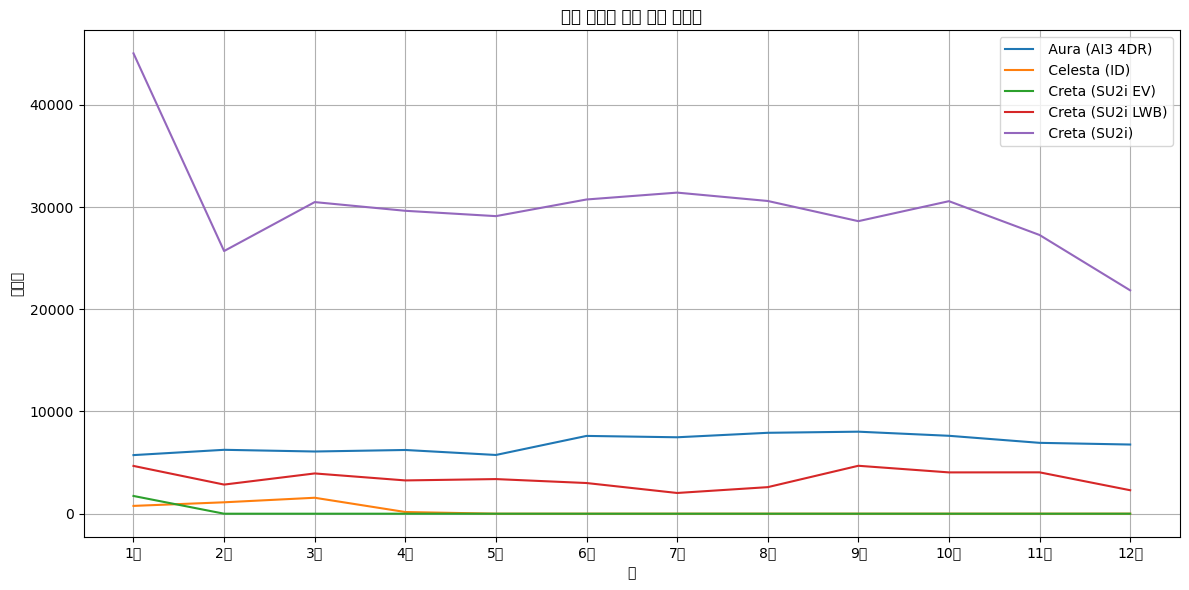

In [36]:
plt.figure(figsize=(12, 6))
for model in line_df.columns[:5]:  # 상위 5개 모델만 예시
    plt.plot(line_df.index, line_df[model], label=model)

plt.title("차량 모델별 월별 판매 트렌드")
plt.xlabel("월")
plt.ylabel("판매량")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [39]:
df_melted

,공장명(국가),차량 모델,판매 구분,연도,월,판매량,월_숫자,날짜
0,HMI,Santro (AH2),내수용,2023,1월,0,1,2023-01-01
1,HMI,Xcent (BA 4DR),내수용,2023,1월,0,1,2023-01-01
2,HMI,Aura (AI3 4DR),내수용,2023,1월,4634,1,2023-01-01
3,HMI,NIOS (AI3 5DR),내수용,2023,1월,8760,1,2023-01-01
4,HMI,i20 (BI3 5DR),내수용,2023,1월,8185,1,2023-01-01
...,...,...,...,...,...,...,...,...
4687,Singapore,IONIQ6 (CE),내수용,2025,12월,0,12,2025-12-01
4688,Singapore,IONIQ5 (NE),수출용,2025,12월,0,12,2025-12-01
4689,Singapore,IONIQ5 Robotaxi (NE R),수출용,2025,12월,0,12,2025-12-01
4690,CKD,PV,합계,2025,12월,0,12,2025-12-01


In [41]:
df_melted.pivot_table(index='공장명(국가)', columns='판매 구분', values='판매량', aggfunc='sum', fill_value=0)

판매 구분,내수용,수출용,합계
공장명(국가),,,
BHMC,378149,50872,0
CKD,0,0,114519
HAOS,85604,427100,0
HMB,395536,34739,0
HMGMA,2629,0,0
HMI,1261534,333961,0
HMMA,705593,41639,0
HMMC,0,689355,0
HMMI,52522,119829,0
